In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime
from matplotlib import rcParams

from matplotlib import rc
rc('font',family='Malgun Gothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [2]:
movie = pd.read_csv("../data/Merge_data/merge_data.csv", parse_dates=['openingdate'])
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가
1,명량,2014-07-30,135748398910,17613682,1587,188611,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가


## 2. 기초통계량 확인

In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   moviename    1047 non-null   object        
 1   openingdate  1047 non-null   datetime64[ns]
 2   sales        1047 non-null   int64         
 3   attendance   1047 non-null   int64         
 4   screen       1047 non-null   int64         
 5   playcount    1047 non-null   int64         
 6   country      1047 non-null   object        
 7   distributor  1047 non-null   object        
 8   director     1047 non-null   object        
 9   genre        1047 non-null   object        
 10  actor        1044 non-null   object        
 11  filmrank     1022 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 98.3+ KB


In [4]:
pd.options.display.float_format = '{:.1f}'.format
movie.describe()

,sales,attendance,screen,playcount
count,1047.0,1047.0,1047.0,1047.0
mean,13516930095.5,1702492.7,693.2,44465.4
std,17335850996.1,2158083.1,388.6,39056.9
min,407193640.0,51681.0,33.0,2179.0
25%,3338669977.5,436801.5,416.5,17927.5
50%,7013842000.0,898945.0,592.0,30736.0
75%,16707136952.5,2091533.0,883.0,57129.5
max,139651845516.0,17613682.0,2835.0,292584.0


## 3. Null값 제거

In [5]:
### 결측행 제거
movie.dropna(inplace=True)

### 인덱스 재설정
movie.reset_index(inplace=True, drop=True)

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   moviename    1022 non-null   object        
 1   openingdate  1022 non-null   datetime64[ns]
 2   sales        1022 non-null   int64         
 3   attendance   1022 non-null   int64         
 4   screen       1022 non-null   int64         
 5   playcount    1022 non-null   int64         
 6   country      1022 non-null   object        
 7   distributor  1022 non-null   object        
 8   director     1022 non-null   object        
 9   genre        1022 non-null   object        
 10  actor        1022 non-null   object        
 11  filmrank     1022 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 95.9+ KB


## 4. 다양한 독립변수에 따른 관람객 수

### 4-1. 개봉월에 따른 관람객 수

In [6]:
# 개봉월(openingmonth) 칼럼 생성
movie['openingmonth'] = movie['openingdate'].dt.month
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,(주)씨제이이엔엠,이병헌,코미디,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,한국,(주)씨제이이엔엠,정세교,다큐멘터리,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,액션,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,한국,(주)씨제이이엔엠,류승완,액션,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,판타지,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가,8


In [7]:
### 월별 관람객 수
movie_month = pd.DataFrame(movie.groupby(by='openingmonth')['attendance'].mean().reset_index())
movie_month

,openingmonth,attendance
0,1,1855247.9
1,2,1349298.4
2,3,1173424.2
3,4,1935841.3
4,5,1571239.5
5,6,1740411.8
6,7,2530996.0
7,8,2133992.4
8,9,1559458.6
9,10,1614676.1


<AxesSubplot:xlabel='openingmonth', ylabel='attendance'>

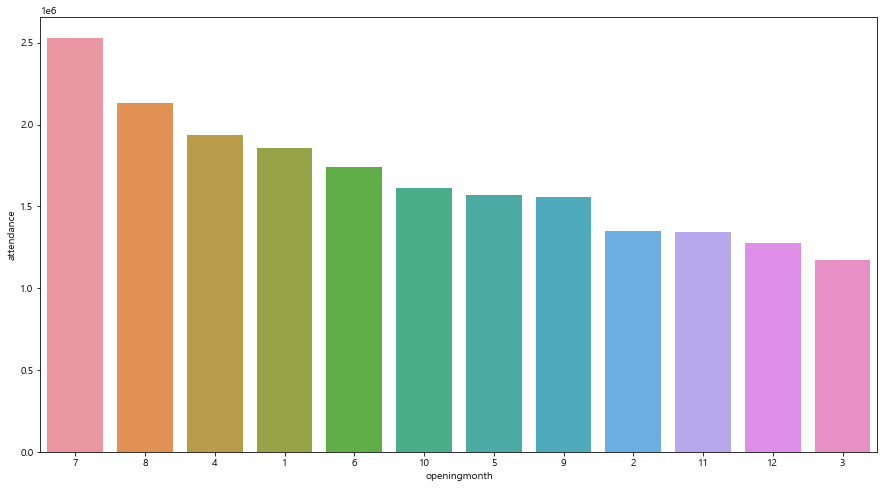

In [8]:
plt.figure(figsize = (15,8))

order=movie.groupby(by='openingmonth')['attendance'].mean().sort_values(ascending=False).index
sns.barplot(x=movie_month['openingmonth'], y=movie_month['attendance'], order=order)

### 4-2. 장르별 관객 수

<AxesSubplot:xlabel='genre', ylabel='attendance'>

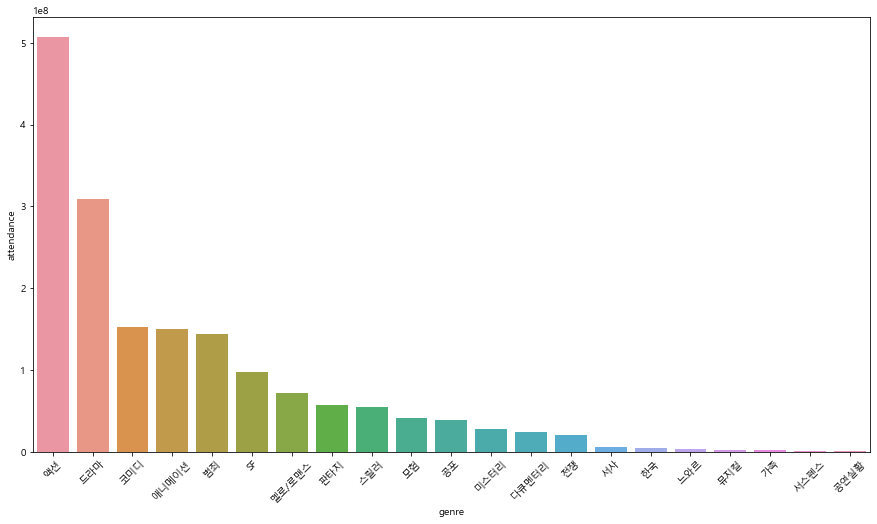

In [9]:
plt.figure(figsize = (15,8))
movie_genre = pd.DataFrame(movie.groupby(by='genre')['attendance'].sum()).reset_index()

order = movie.groupby(by='genre')['attendance'].sum().sort_values(ascending=False).index
plt.xticks(rotation = 45)
sns.barplot(x=movie_genre['genre'], y=movie_genre['attendance'], order=order)

#### 장르 범주화

In [11]:
movie['genre'].value_counts()

액션        233
드라마       204
애니메이션     151
코미디        85
범죄         58
멜로/로맨스     57
공포         41
스릴러        41
SF         37
판타지        34
모험         27
미스터리       22
다큐멘터리       9
전쟁          6
한국          5
느와르         3
가족          3
서스펜스        2
공연실황        2
서사          1
뮤지컬         1
Name: genre, dtype: int64

In [12]:
# 영화수가 20개 이상인 장르를 범주화 하고 그 외의 장르들은 그 외로 범주화
# 액션, 드라마, 애니메이션, 코미디, 범죄, 멜로/로맨스, 공포, 스릴러/서스펜스, SF, 판타지, 모험, 미스터리, 그외

genre_list=[]

for i in range(len(movie['genre'])):
    
    if movie['genre'][i] == '코미디':
        genre_list.append('comedy')
    elif movie['genre'][i] == '액션':
        genre_list.append('action')
    elif movie['genre'][i] == '판타지':
        genre_list.append('fantasy')
    elif movie['genre'][i] == '드라마':
        genre_list.append('drama')
    elif movie['genre'][i] == '범죄':
        genre_list.append('crime')
    elif movie['genre'][i] == '애니메이션':
        genre_list.append('animation')
    elif movie['genre'][i] == 'SF':
        genre_list.append('sf')
    elif movie['genre'][i] == '모험':
        genre_list.append('adventure')
    elif movie['genre'][i] == '미스터리':
        genre_list.append('mystery')      
    elif movie['genre'][i] == '멜로/로맨스':
        genre_list.append('romance')
    elif movie['genre'][i] == '스릴러' or movie['genre'][i] == '서스펜스' :
        genre_list.append('thriller')
    elif movie['genre'][i] == '공포':
        genre_list.append('fear')
    else:
        genre_list.append('etc')
        

movie['genre'] = genre_list

In [13]:
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,(주)씨제이이엔엠,이병헌,comedy,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",[국내] 15세 관람가,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,한국,(주)씨제이이엔엠,정세교,etc,"김한민, 오타니 료헤이, 이해영",[국내] 12세 관람가,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,action,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",[국내] 12세 관람가,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,한국,(주)씨제이이엔엠,류승완,action,"황정민(서도철), 유아인(조태오), 유해진(최상무)",[국내] 15세 관람가,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,fantasy,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",[국내] 12세 관람가,8


### 4-3. 관람등급별 관객 수

In [14]:
movie['filmrank'].value_counts()

[국내] 15세 관람가                309
[국내] 12세 관람가                208
[국내] 전체 관람가                 110
[국내] 12세 관람가 [해외] PG-13     100
[국내] 청소년 관람불가                96
[국내] 전체 관람가 [해외] PG          67
[국내] 15세 관람가 [해외] PG-13      62
[국내] 15세 관람가 [해외] R          25
[국내] 청소년 관람불가 [해외] R         23
[국내] 전체 관람가 [해외] G            7
[국내] 12세 관람가 [해외] PG          6
[국내] 12세 관람가 [해외] NR          3
[국내] 전체 관람가 [해외] PG-13        2
[국내] 15세 관람가 [해외] NR          2
[국내] 청소년 관람불가 [해외] PG-13      1
[해외] PG                       1
Name: filmrank, dtype: int64

In [15]:
# [해외] PG 요소는 하나 밖에 존재하지 않는 예외 이므로 제거
movie = movie[movie['filmrank'] != '[해외] PG']
movie.reset_index(inplace=True, drop=True)

In [16]:
movie_rank = pd.DataFrame(movie.groupby('filmrank')['attendance'].sum())
movie_rank

,attendance
filmrank,
[국내] 12세 관람가,451008340
[국내] 12세 관람가 [해외] NR,3321443
[국내] 12세 관람가 [해외] PG,3891654
[국내] 12세 관람가 [해외] PG-13,162266971
[국내] 15세 관람가,624146288
[국내] 15세 관람가 [해외] NR,4610452
[국내] 15세 관람가 [해외] PG-13,82567338
[국내] 15세 관람가 [해외] R,22470057
[국내] 전체 관람가,88834645


#### 관람등급 전처리

In [17]:
## 연령대만 추출 후 숫자형으로 변환
#전체관람가 : 0, 12세관람가 : 1, 15세관람가 : 2, 청소년관람불가 : 3

filmrank_num_list=[]

movie["filmrank"] = [filmrank_num.split()[1] for filmrank_num in movie['filmrank']]

for i in range(len(movie['filmrank'])):
    
    if movie['filmrank'][i] == '전체':
        filmrank_num_list.append('G_rated')
        
    elif movie['filmrank'][i] == '12세':
        filmrank_num_list.append('PG 12')
    
    elif movie['filmrank'][i] == '15세':
        filmrank_num_list.append('PG 15')
        
    elif movie['filmrank'][i] == '청소년':
        filmrank_num_list.append('X_rated')
        

movie['filmrank'] = filmrank_num_list
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,(주)씨제이이엔엠,이병헌,comedy,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",PG 15,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,한국,(주)씨제이이엔엠,정세교,etc,"김한민, 오타니 료헤이, 이해영",PG 12,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,action,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",PG 12,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,한국,(주)씨제이이엔엠,류승완,action,"황정민(서도철), 유아인(조태오), 유해진(최상무)",PG 15,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,한국,롯데컬처웍스(주)롯데엔터테인먼트,김용화,fantasy,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",PG 12,8


In [18]:
movie_rank = pd.DataFrame(movie.groupby('filmrank')['attendance'].sum())
movie_rank

,attendance
filmrank,
G_rated,182833794
PG 12,620488408
PG 15,733794135
X_rated,176308131


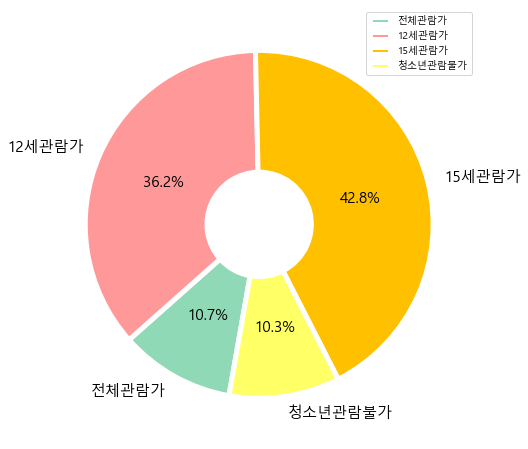

In [19]:
labels = ['전체관람가', '12세관람가', '15세관람가', '청소년관람불가']
values = list(movie_rank['attendance'])
colors5 = ['#8fd9b6', '#ff9999', '#ffc000', '#ffff66', '#d395d0']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize = (15,8))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors5, wedgeprops=wedgeprops,
       textprops={'fontsize':15})
plt.legend(labels=labels, loc='upper right')
plt.show()

### 4-4. 개봉국가 전처리

In [20]:
movie_country = pd.DataFrame(movie['country'].value_counts()).reset_index().rename(columns={"index":"country", "country":"num"})
movie_country

,country,num
0,미국,469
1,한국,461
2,일본,34
3,영국,16
4,프랑스,11
5,중국,6
6,독일,4
7,러시아,4
8,벨기에,3
9,스페인,3


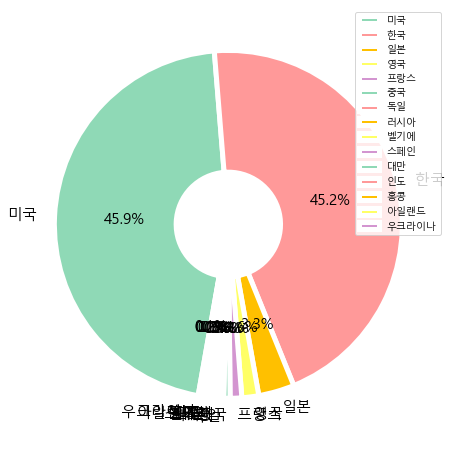

In [21]:
labels = list(movie_country['country'])
values = list(movie_country['num'])
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize = (15,8))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors5, wedgeprops=wedgeprops,
       textprops={'fontsize':15})
plt.legend(labels=labels)
plt.show()

In [22]:
## country == 한국 : domestic , country != 한국 : abroad
country_list=[]

for i in range(len(movie['country'])):
    if movie['country'][i] == '한국':
        country_list.append('domestic')
    else:
        country_list.append('abroad')

movie['country'] = country_list

In [23]:
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,(주)씨제이이엔엠,이병헌,comedy,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",PG 15,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,(주)씨제이이엔엠,정세교,etc,"김한민, 오타니 료헤이, 이해영",PG 12,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,action,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",PG 12,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,(주)씨제이이엔엠,류승완,action,"황정민(서도철), 유아인(조태오), 유해진(최상무)",PG 15,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,롯데컬처웍스(주)롯데엔터테인먼트,김용화,fantasy,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",PG 12,8


### 4-5. 배급사별 관람객 수

#### 배급사 전처리

In [24]:
movie['distributor'].value_counts()

(주)씨제이이엔엠                        146
롯데쇼핑㈜롯데엔터테인먼트                    108
(주)넥스트엔터테인먼트월드(NEW)               88
워너브러더스 코리아(주)                     84
유니버설픽쳐스인터내셔널 코리아(유)               72
                                ... 
(주)피터팬픽쳐스,이십세기폭스코리아(주)             1
롯데컬처웍스(주)롯데엔터테인먼트,(주)키다리이엔티        1
글뫼 주식회사,이십세기폭스코리아(주)               1
(주)넥스트엔터테인먼트월드(NEW),(주)씨제이이엔엠      1
주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)         1
Name: distributor, Length: 133, dtype: int64

In [25]:
movie_dist = pd.DataFrame(movie.groupby('distributor')['attendance'].sum().sort_values(ascending=False).head(10))
movie_dist

,attendance
distributor,
(주)씨제이이엔엠,361335891
(주)쇼박스,176634377
(주)넥스트엔터테인먼트월드(NEW),168642585
롯데쇼핑㈜롯데엔터테인먼트,153088167
워너브러더스 코리아(주),135270146
이십세기폭스코리아(주),97024525
유니버설픽쳐스인터내셔널 코리아(유),85175540
월트디즈니컴퍼니코리아 유한책임회사,82038632
롯데컬처웍스(주)롯데엔터테인먼트,48266989


In [26]:
# 국내 메이져 영화사 : CJ E & M, 롯데, 쇼박스, 넥스트엔터테인먼월드(NEW) -> major_domestic
# 해외 메이져 영화사 : 월트디즈니, 유니버설픽쳐스, 워너스브러더스  -> major_abroad
# 그외 배급사 : etc_distributor

distributor_list=[]

for dist in movie['distributor']:
    if ('씨제이이엔엠' in dist) or ('CJ ENM' in dist) or ('롯데' in dist) or\
    ('쇼박스' in dist) or ('(NEW)' in dist):
        distributor_list.append('major_domestic')
    elif ('월트디즈니' in dist) or ('유니' in dist) or ('워너브러더스' in dist):
        distributor_list.append('major_abroad')
    else:
        distributor_list.append('etc_distributor')
    
movie['distributor'] = distributor_list

In [28]:
movie_dis = pd.DataFrame(movie['distributor'].value_counts()).reset_index()
movie_dis

,index,distributor
0,major_domestic,459
1,etc_distributor,323
2,major_abroad,239


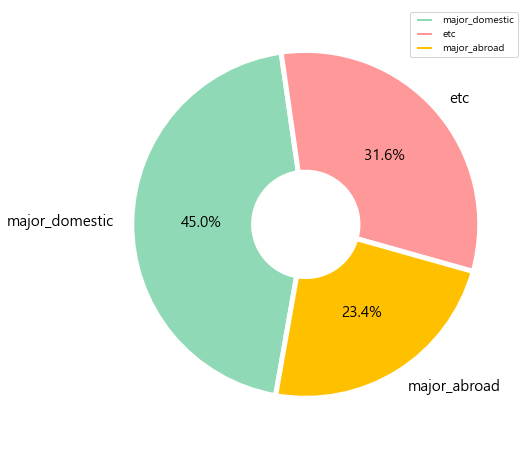

In [30]:
labels = ['major_domestic', 'etc', 'major_abroad']
values = list(movie_dis['distributor'])
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize = (15,8))
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, colors=colors5, counterclock=False, wedgeprops=wedgeprops,
       textprops={'fontsize':15})
plt.legend(labels=labels, loc='upper right')
plt.show()

In [31]:
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,major_domestic,이병헌,comedy,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",PG 15,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,major_domestic,정세교,etc,"김한민, 오타니 료헤이, 이해영",PG 12,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,major_abroad,안소니 루소,action,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",PG 12,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,major_domestic,류승완,action,"황정민(서도철), 유아인(조태오), 유해진(최상무)",PG 15,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,major_domestic,김용화,fantasy,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",PG 12,8


### 4-6. 감독별 관람객 수

In [33]:
direc_num = movie['director'].value_counts()
direc_num

유야마 쿠니히코    6
폴 앤더슨       6
시즈노 코분      6
우민호         6
크리스토퍼 놀란    6
           ..
코린 하디       1
임상수         1
최호          1
렌 와이즈먼      1
올레 말라므      1
Name: director, Length: 692, dtype: int64

In [34]:
# 감독의 이전 영화 관람객 수 / 영화 수
for dir in movie['director'].unique():
    movie_audience = movie['attendance'][movie['director']==dir].sum()
    movie_num = movie['director'][movie['director']==dir]
    
    movie['director'][movie['director']==dir] = int(movie_audience / movie_num.count())
    
movie.head()

C:\Users\PC\AppData\Local\Temp/ipykernel_15868/3069055907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['director'][movie['director']==dir] = int(movie_audience / movie_num.count())


,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,major_domestic,6834886,comedy,"류승룡(고반장), 이하늬(장형사), 진선규(마형사)",PG 15,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,major_domestic,8982706,etc,"김한민, 오타니 료헤이, 이해영",PG 12,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,major_abroad,10224854,action,"로버트 다우니 주니어(토니 스타크 / 아이언맨), 크리스 에반스(스티브 로저스 / ...",PG 12,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,major_domestic,7576385,action,"황정민(서도철), 유아인(조태오), 유해진(최상무)",PG 15,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,major_domestic,6491963,fantasy,"하정우(강림), 주지훈(해원맥), 김향기(덕춘)",PG 12,8


### 4-7. 배우 수

In [35]:
## actor를 이름에서 actor의 수로 변환
movie['actor'] = movie.actor.str.count(',') + 1

movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,major_domestic,6834886,comedy,3,PG 15,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,major_domestic,8982706,etc,3,PG 12,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,major_abroad,10224854,action,3,PG 12,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,major_domestic,7576385,action,3,PG 15,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,major_domestic,6491963,fantasy,3,PG 12,8


## 5. Dummy Variable

### 범주형 변수 Dummy 변수로 변환

In [36]:
country_list = movie.country.unique().tolist()
distributor_list = movie.distributor.unique().tolist()
genre_list = movie.genre.unique().tolist()
filmrank_list = movie.filmrank.unique().tolist()

movie.insert(movie.columns.tolist().index('country')+1, 'country_label',
            movie.country.map(lambda x: country_list.index(x)))
movie.insert(movie.columns.tolist().index('distributor')+1, 'distributor_label',
            movie.distributor.map(lambda x: distributor_list.index(x)))
movie.insert(movie.columns.tolist().index('genre')+1, 'genre_label',
            movie.genre.map(lambda x: genre_list.index(x)))
movie.insert(movie.columns.tolist().index('filmrank')+1, 'filmrank_label',
            movie.filmrank.map(lambda x: filmrank_list.index(x)))

In [37]:
movie.head(10)

,moviename,openingdate,sales,attendance,screen,playcount,country,country_label,distributor,distributor_label,director,genre,genre_label,actor,filmrank,filmrank_label,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,0,major_domestic,0,6834886,comedy,0,3,PG 15,0,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,0,major_domestic,0,8982706,etc,1,3,PG 12,1,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,1,major_abroad,1,10224854,action,2,3,PG 12,1,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,0,major_domestic,0,7576385,action,2,3,PG 15,0,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,0,major_domestic,0,6491963,fantasy,3,3,PG 12,1,8
5,어벤져스: 인피니티 워,2018-04-25,99926399769,11212710,2553,240501,abroad,1,major_abroad,1,10224854,action,2,3,PG 12,1,4
6,택시운전사,2017-08-02,95853645649,12186327,1906,184075,domestic,0,major_domestic,0,6849425,drama,4,3,PG 15,0,8
7,도둑들,2012-07-25,93664808500,12983178,1091,155392,domestic,0,major_domestic,0,12983178,crime,5,3,PG 15,0,7
8,부산행,2016-07-20,93178283048,11565479,1788,151315,domestic,0,major_domestic,0,5455944,action,2,3,PG 15,0,7
9,7번방의 선물,2013-01-23,91431914670,12811206,866,166815,domestic,0,major_domestic,0,4590240,comedy,0,3,PG 15,0,1


In [38]:
movie.to_csv("../data/Preprocessing_movie_data/movie.csv",index=False)
movie.to_excel("../data/Preprocessing_movie_data/movie.xlsx",index=False)

In [39]:
country_group = movie.groupby(movie.country)
movie_country_domestic = country_group.get_group('domestic')
movie_country_abroad = country_group.get_group('abroad')

movie_country_domestic.drop(['country', 'country_label'], axis=1, inplace=True)
movie_country_abroad.drop(['country', 'country_label'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
movie_country_domestic.to_csv("../data/Preprocessing_movie_data/movie_country_domestic.csv",index=False)
movie_country_domestic.to_excel("../data/Preprocessing_movie_data/movie_country_domestic.xlsx",index=False)

movie_country_abroad.to_csv("../data/Preprocessing_movie_data/movie_country_abroad.csv",index=False)
movie_country_abroad.to_excel("../data/Preprocessing_movie_data/movie_country_abroad.xlsx",index=False)

In [41]:
distributor_group = movie.groupby(movie.distributor)
movie_distributor_major_domestic = distributor_group.get_group('major_domestic')
movie_distributor_major_abroad = distributor_group.get_group('major_abroad')
movie_distributor_etc = distributor_group.get_group('etc_distributor')

movie_distributor_major_domestic.drop(['distributor', 'distributor_label'], axis=1, inplace=True)
movie_distributor_major_abroad.drop(['distributor', 'distributor_label'], axis=1, inplace=True)
movie_distributor_etc.drop(['distributor', 'distributor_label'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
movie_distributor_major_domestic.to_csv('../data/Preprocessing_movie_data/movie_distributor_major_domestic.csv', index=False)
movie_distributor_major_domestic.to_excel('../data/Preprocessing_movie_data/movie_distributor_major_domestic.xlsx', index=False)

movie_distributor_major_abroad.to_csv('../data/Preprocessing_movie_data/movie_distributor_major_abroad.csv', index=False)
movie_distributor_major_abroad.to_excel('../data/Preprocessing_movie_data/movie_distributor_major_abroad.xlsx', index=False)

movie_distributor_etc.to_csv('../data/Preprocessing_movie_data/movie_distributor_etc.csv', index=False)
movie_distributor_etc.to_excel('../data/Preprocessing_movie_data/movie_distributor_etc.xlsx', index=False)

In [46]:
for i in movie.genre.unique().tolist():
    print(i)
    print(i)
    print(i)
    print(i)

comedy
comedy
comedy
comedy
etc
etc
etc
etc
action
action
action
action
fantasy
fantasy
fantasy
fantasy
drama
drama
drama
drama
crime
crime
crime
crime
animation
animation
animation
animation
sf
sf
sf
sf
adventure
adventure
adventure
adventure
mystery
mystery
mystery
mystery
romance
romance
romance
romance
thriller
thriller
thriller
thriller
fear
fear
fear
fear


In [45]:
genre_group = movie.groupby(movie.genre)
movie_genre_comedy = genre_group.get_group('comedy')
movie_genre_etc = genre_group.get_group('etc')
movie_genre_action = genre_group.get_group('action')
movie_genre_fantasy = genre_group.get_group('fantasy')
movie_genre_drama = genre_group.get_group('drama')
movie_genre_crime = genre_group.get_group('crime')
movie_genre_animation = genre_group.get_group('animation')
movie_genre_sf = genre_group.get_group('sf')
movie_genre_adventure = genre_group.get_group('adventure')
movie_genre_mystery = genre_group.get_group('mystery')
movie_genre_romance = genre_group.get_group('romance')
movie_genre_thriller = genre_group.get_group('thriller')
movie_genre_fear = genre_group.get_group('fear')

movie_genre_comedy.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_etc.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_action.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_fantasy.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_drama.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_crime.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_animation.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_sf.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_adventure.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_mystery.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_romance.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_thriller.drop(['genre', 'genre_label'], axis=1, inplace=True)
movie_genre_fear.drop(['genre', 'genre_label'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
movie_genre_comedy.to_csv('../data/Preprocessing_movie_data/movie_genre_comedy.csv', index=False)
movie_genre_comedy.to_excel('../data/Preprocessing_movie_data/movie_genre_comedy.xlsx', index=False)

movie_genre_etc.to_csv('../data/Preprocessing_movie_data/movie_genre_etc.csv', index=False)
movie_genre_etc.to_excel('../data/Preprocessing_movie_data/movie_genre_etc.xlsx', index=False)

movie_genre_action.to_csv('../data/Preprocessing_movie_data/movie_genre_action.csv', index=False)
movie_genre_action.to_excel('../data/Preprocessing_movie_data/movie_genre_action.xlsx', index=False)

movie_genre_fantasy.to_csv('../data/Preprocessing_movie_data/movie_genre_fantasy.csv', index=False)
movie_genre_fantasy.to_excel('../data/Preprocessing_movie_data/movie_genre_fantasy.xlsx', index=False)

movie_genre_drama.to_csv('../data/Preprocessing_movie_data/movie_genre_drama.csv', index=False)
movie_genre_drama.to_excel('../data/Preprocessing_movie_data/movie_genre_drama.xlsx', index=False)

movie_genre_crime.to_csv('../data/Preprocessing_movie_data/movie_genre_crime.csv', index=False)
movie_genre_crime.to_excel('../data/Preprocessing_movie_data/movie_genre_crime.xlsx', index=False)

movie_genre_animation.to_csv('../data/Preprocessing_movie_data/movie_genre_animation.csv', index=False)
movie_genre_animation.to_excel('../data/Preprocessing_movie_data/movie_genre_animation.xlsx', index=False)

movie_genre_sf.to_csv('../data/Preprocessing_movie_data/movie_genre_sf.csv', index=False)
movie_genre_sf.to_excel('../data/Preprocessing_movie_data/movie_genre_sf.xlsx', index=False)

movie_genre_adventure.to_csv('../data/Preprocessing_movie_data/movie_genre_adventure.csv', index=False)
movie_genre_adventure.to_excel('../data/Preprocessing_movie_data/movie_genre_adventure.xlsx', index=False)

movie_genre_mystery.to_csv('../data/Preprocessing_movie_data/movie_genre_mystery.csv', index=False)
movie_genre_mystery.to_excel('../data/Preprocessing_movie_data/movie_genre_mystery.xlsx', index=False)

movie_genre_romance.to_csv('../data/Preprocessing_movie_data/movie_genre_romance.csv', index=False)
movie_genre_romance.to_excel('../data/Preprocessing_movie_data/movie_genre_romance.xlsx', index=False)

movie_genre_thriller.to_csv('../data/Preprocessing_movie_data/movie_genre_thriller.csv', index=False)
movie_genre_thriller.to_excel('../data/Preprocessing_movie_data/movie_genre_thriller.xlsx', index=False)

movie_genre_fear.to_csv('../data/Preprocessing_movie_data/movie_genre_fear.csv', index=False)
movie_genre_fear.to_excel('../data/Preprocessing_movie_data/movie_genre_fear.xlsx', index=False)

In [48]:
filmrank_gorup = movie.groupby(movie.filmrank)
movie_filmrank_g = filmrank_gorup.get_group('G_rated')
movie_filmrank_15 = filmrank_gorup.get_group('PG 15')
movie_filmrank_x = filmrank_gorup.get_group('X_rated')
movie_filmrank_12 = filmrank_gorup.get_group('PG 12')

movie_filmrank_g.drop(['filmrank', 'filmrank_label'], axis=1, inplace=True)
movie_filmrank_15.drop(['filmrank', 'filmrank_label'], axis=1, inplace=True)
movie_filmrank_x.drop(['filmrank', 'filmrank_label'], axis=1, inplace=True)
movie_filmrank_12.drop(['filmrank', 'filmrank_label'], axis=1, inplace=True)

C:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
movie_filmrank_g.to_csv('../data/Preprocessing_movie_data/movie_filmrank_g.csv', index=False)
movie_filmrank_g.to_excel('../data/Preprocessing_movie_data/movie_filmrank_g.xlsx', index=False)

movie_filmrank_15.to_csv('../data/Preprocessing_movie_data/movie_filmrank_15.csv', index=False)
movie_filmrank_15.to_excel('../data/Preprocessing_movie_data/movie_filmrank_15.xlsx', index=False)

movie_filmrank_x.to_csv('../data/Preprocessing_movie_data/movie_filmrank_x.csv', index=False)
movie_filmrank_x.to_excel('../data/Preprocessing_movie_data/movie_filmrank_x.xlsx', index=False)

movie_filmrank_12.to_csv('../data/Preprocessing_movie_data/movie_filmrank_12.csv', index=False)
movie_filmrank_12.to_excel('../data/Preprocessing_movie_data/movie_filmrank_12.xlsx', index=False)

In [50]:
movie_dum = pd.get_dummies(movie, columns = ['country','distributor','genre','filmrank'])
movie_dum

,moviename,openingdate,sales,attendance,screen,playcount,country_label,distributor_label,director,genre_label,...,genre_fantasy,genre_fear,genre_mystery,genre_romance,genre_sf,genre_thriller,filmrank_G_rated,filmrank_PG 12,filmrank_PG 15,filmrank_X_rated
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,0,0,6834886,0,...,0,0,0,0,0,0,0,0,1,0
1,명량,2014-07-30,135748398910,17613682,1587,188611,0,0,8982706,1,...,0,0,0,0,0,0,0,1,0,0
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,1,1,10224854,2,...,0,0,0,0,0,0,0,1,0,0
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,0,0,7576385,2,...,0,0,0,0,0,0,0,0,1,0
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,0,0,6491963,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,더 프린세스 : 도둑맞은 공주,2020-08-12,457449660,55828,423,4192,1,2,55828,6,...,0,0,0,0,0,0,1,0,0,0
1017,프리키 데스데이,2020-11-25,451225690,51812,631,12882,1,1,232331,0,...,0,0,0,0,0,0,0,0,1,0
1018,날씨의 아이,2019-10-30,444956180,58968,194,5921,1,2,1848288,6,...,0,0,0,0,0,0,0,0,1,0
1019,눈의 여왕4,2019-12-24,444649620,67159,271,2239,1,0,172036,6,...,0,0,0,0,0,0,1,0,0,0


In [55]:
movie_dum = movie_dum.reindex(columns=['moviename', 'openingdate', 'attendance', 'screen',
       'playcount', 'director', 'actor', 'openingmonth', 'country_abroad',
       'country_domestic','distributor_etc_distributor',
       'distributor_major_abroad', 'distributor_major_domestic',
       'genre_action', 'genre_adventure', 'genre_animation', 'genre_comedy',
       'genre_crime', 'genre_drama', 'genre_etc', 'genre_fantasy',
       'genre_fear', 'genre_mystery', 'genre_romance', 'genre_sf',
       'genre_thriller', 'filmrank_G_rated', 'filmrank_PG 12',
       'filmrank_PG 15', 'filmrank_X_rated', 'sales'])
movie_dum

,moviename,openingdate,attendance,screen,playcount,director,actor,openingmonth,country_abroad,country_domestic,...,genre_fear,genre_mystery,genre_romance,genre_sf,genre_thriller,filmrank_G_rated,filmrank_PG 12,filmrank_PG 15,filmrank_X_rated,sales
0,극한직업,2019-01-23,16265618,2003,292584,6834886,3,1,0,1,...,0,0,0,0,0,0,0,1,0,139651845516
1,명량,2014-07-30,17613682,1587,188611,8982706,3,7,0,1,...,0,0,0,0,0,0,1,0,0,135748398910
2,어벤져스: 엔드게임,2019-04-24,13934592,2835,242001,10224854,3,4,1,0,...,0,0,0,0,0,0,1,0,0,122182694160
3,베테랑,2015-08-05,13414009,1115,199231,7576385,3,8,0,1,...,0,0,0,0,0,0,0,1,0,105168155250
4,신과함께-인과 연,2018-08-01,12274996,2235,179981,6491963,3,8,0,1,...,0,0,0,0,0,0,1,0,0,102666146909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,더 프린세스 : 도둑맞은 공주,2020-08-12,55828,423,4192,55828,3,8,1,0,...,0,0,0,0,0,1,0,0,0,457449660
1017,프리키 데스데이,2020-11-25,51812,631,12882,232331,2,11,1,0,...,0,0,0,0,0,0,0,1,0,451225690
1018,날씨의 아이,2019-10-30,58968,194,5921,1848288,3,10,1,0,...,0,0,0,0,0,0,0,1,0,444956180
1019,눈의 여왕4,2019-12-24,67159,271,2239,172036,3,12,1,0,...,0,0,0,0,0,1,0,0,0,444649620


## 6. to_csv

In [56]:
movie_dum.to_csv("../data/Preprocessing_movie_data/final_data.csv",index=False)
movie_dum.to_excel("../data/Preprocessing_movie_data/final_data.xlsx",index=False)